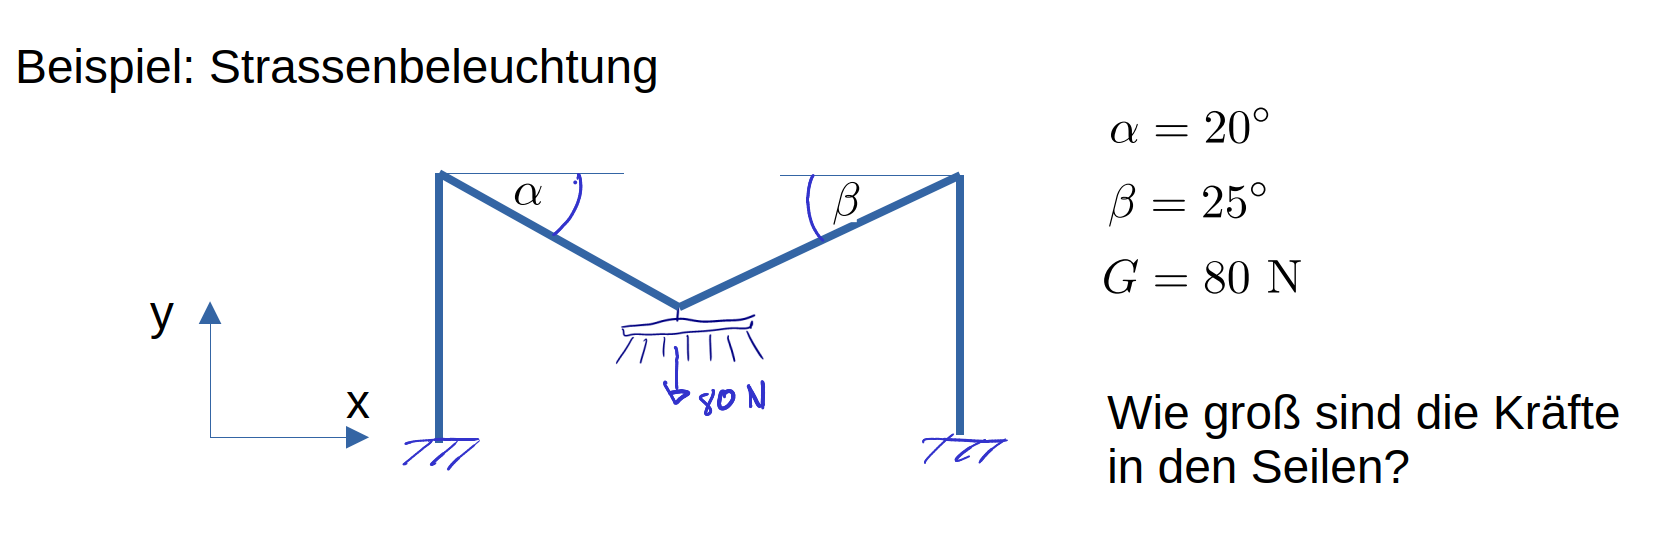

In [1]:
from numpy import array,cos,radians,sin
from numpy.linalg import solve
# Kräftegleichgewicht
# Beispiel Strassenbeleuchtung
G=80
alp=20
beta=25
alp=radians(alp)
beta=radians(beta)
S=array([0,0])
k=array([[-cos(alp), cos(beta)],
         [sin(alp), sin(beta)]])
r=array([0,G])
S=solve(k,r)
print(S)

[102.53702113 106.3140839 ]


(-3428.2131, 47.2255, -0.0)

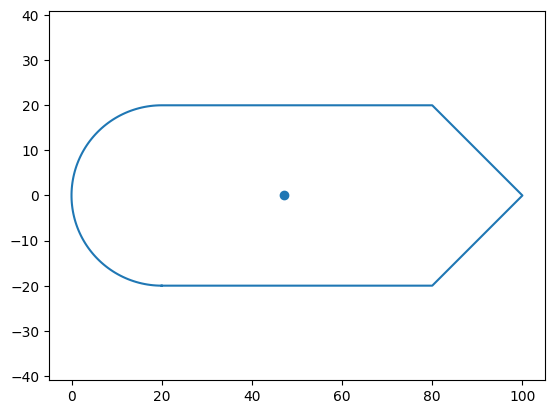

In [20]:
# Flächenschwerpunkt Polygonzug
%reset -f
from numpy import array
from numpy import linspace,pi,cos,sin,append, radians


class Circle():

    def __init__(self, middle=(0, 0), parts=1, radius=1, flip=False, rotation=0):
        self.middle = middle
        self.parts = parts
        self.radius = radius
        self.flip = flip
        self.rotation = rotation
        self.x, self.y = self.calc_path()

    def rotate_around_point(self, x, y, rotation, origin):
        rotation = radians(rotation)
        x = x-origin[0]
        y = y-origin[1]
        x_new = x*cos(rotation)-y*sin(rotation)
        y_new = x*sin(rotation)+y*cos(rotation)
        x_new += origin[0]
        y_new += origin[1]
        return x_new,y_new

    def calc_path(self):
        phi=linspace(0,-pi*(self.parts * 2),100)[::-1]
        x = self.radius*cos(phi) + self.middle[0]
        y = self.radius*sin(phi) + self.middle[1]

        x,y = self.rotate_around_point(x,y,self.rotation,self.middle)
        if self.flip:
            x = x[::-1]
            y = y[::-1]
        return x,y

#print(circle((1,2), 0.25, 1))

def poly(x,y):
    from matplotlib.pylab import plot, axis, scatter
    if len(x)==0:
        a, sx, sy, xs, ys = 0
    else:
        a=0
        sx=0;
        sy=0;
        for i in range(len(x)-1):
            dxdy = (x[i]*y[i+1]-x[i+1]*y[i])
            a += dxdy
            sx += dxdy*(y[i]+y[i+1])
            sy += dxdy*(x[i]+x[i+1])
            
        a = a/2
        sx = sx/6
        sy = sy/6
        xs = sy/a
        ys = sx/a
        plot (x,y);
        axis ('equal')
        #axis ('off')
        scatter(xs,ys)
    return round(a, 4),round(xs, 4),round(ys, 4)


#x=array([0,0,1,*circle((1,3), parts=0.25)[0],2,3,5,5,0])
#y=array([0,2,2,*circle((1,3), parts=0.25)[1],4,5,5,0,0])
c = Circle((20,0), parts=0.5, radius=20, rotation=270, flip=True)
x = array([*c.x, 80, 100, 80, 20])
y = array([*c.y, 20, 0, -20, -20])

#c = Circle((1,8), parts=0.25, radius=1, rotation=180, flip=True)
#x = array([0, 0, *c.x, 2])
#y = array([0, 8, *c.y, 9])


poly(x, y)

(314.1461, 8.4881, 8.4881)


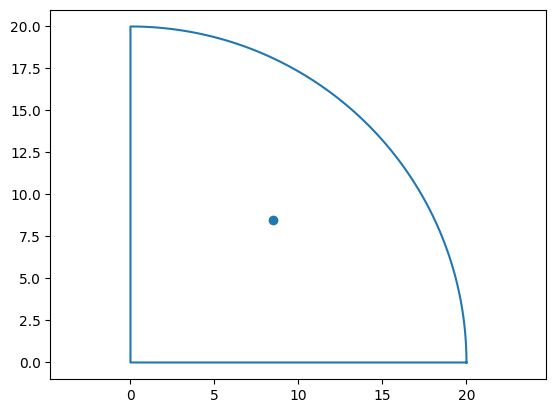

In [13]:
#Flächenschwerpunkt Kreisviertel
from numpy import linspace,pi,cos,sin,append
r=20
phi=linspace(0,pi/2,100)
x=r*cos(phi)
y=r*sin(phi)
x=append(x,[0,r])
y=append(y,[0,0])
print(poly(x,y))

(-0.0, 0.6366, 0.6366)


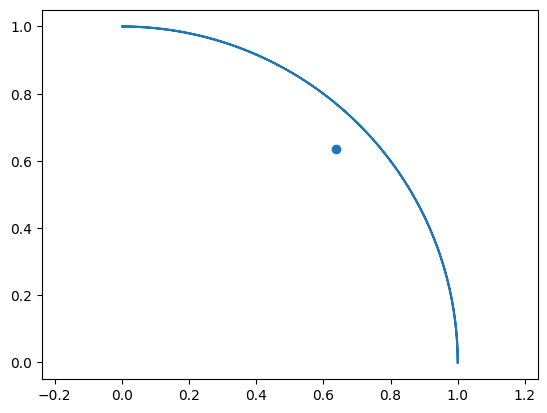

In [4]:
# Linienschwerpunkt Kreisviertelbogen
from numpy import linspace,pi,cos,sin,append, arange
r=1
t=0.000000001
phi=linspace(0,pi/2,100)
x=r*cos(phi)
y=r*sin(phi)

x=append(x,[0])
y=append(y,[r-t])

phi=arange(pi/2,0,-pi/2/100)
x1=(r-t)*cos(phi)
y1=(r-t)*sin(phi)
x=append(x,x1)
y=append(y,y1)

x=append(x,[r])
y=append(y,[0])
print(poly(x,y))



1.45754604517185e-6 6.67596772297363


(0.0, 6.6760)

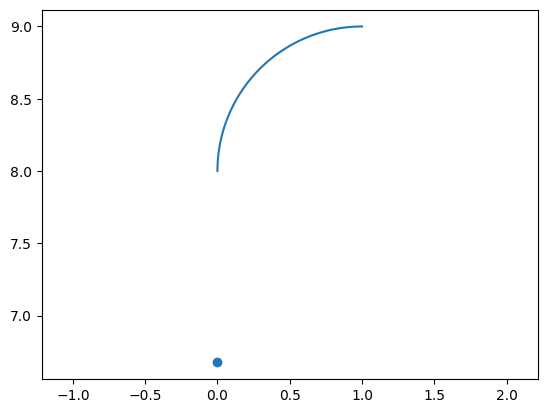

In [49]:
#Linienschwerpunkt - zusammengesetze Linie
# 
from numpy import linspace,pi,cos,sin,append, arange, vectorize
from sympy import sqrt
from matplotlib.pylab import plot, axis, scatter

def line(x, y):

    ax = 0
    ay = 0
    sum_l = 0
    for i in range(len(x)-1):
        if isinstance(x[i], Circle):
            c = x[i]
            x = x[i].x
            y = y[i].y
            if i != 0:
                dx = x[i+1] - 2 / pi
                dy = y[i-1] + 2 / pi
            else:
                dx = 0 - 2 / pi
                dy = 0 + 2 / pi
            l = 2 * pi * c.radius * c.parts
            sum_l += l
        elif isinstance(x[i+1], Circle):
            continue
        else:
            dx = x[i+1]-x[i]
            dy = y[i+1]-y[i]
            l = sqrt(dx**2+dy**2)
            sum_l += l
            ax += dx * l
            ay += dy * l

    ax = ax/sum_l
    ay = ay/sum_l

    def replace_circle_x(item):
        if isinstance(item, Circle):
            return item.x
        else:
            return item
    def replace_circle_y(item):
        if isinstance(item, Circle):
            return item.y
        else:
            return item

    replace_x = vectorize(replace_circle_x)
    replace_y = vectorize(replace_circle_y)

    x = replace_x(x)
    y = replace_y(y)
    plot (x,y);
    axis ('equal')
    #axis ('off')
    scatter(ax,ay)

    print(ax, ay)
    return round(ax, 4),round(ay, 4)

c = Circle((1,8), parts=0.25, radius=1, rotation=180, flip=True)
x = array([0, 0, c, 1, 2])
y = array([0, 8, c, 9, 9])

line(x, y)


In [5]:
# Integrieren und differenzieren mit sympy
# Vereinfachen und ausrechnen

from sympy import symbols, integrate,sqrt,diff,simplify,expand,sin, E
x=symbols('x')

func = (x * sqrt(x))

# integrate
t=integrate(func)
display(t)

#differentiate
# t=diff(t)
# display(func)

#simplify
display(simplify(t))


# display(expand((x-2)**2))

2*x**(5/2)/5

2*x**(5/2)/5

Integrale:
--------------------


2*x**(3/2)/3

-2*x**(3/2)/3

--------------------
Fläche: (|F(x)| + |G(x)|)


4*sqrt(3)

--------------------
Schwerpunkt: 


Point2D(9/5, 0)

--------------------
Xs oben / unten 


4*x**(5/2)/5

4*x**(3/2)/3

--------------------
Ys oben / unten 


0

4*x**(3/2)/3

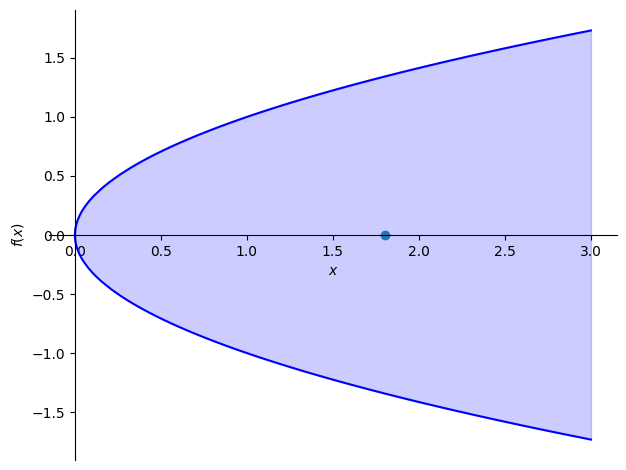

In [6]:
# Flächenschwerpunkt von zwei Graphen

from sympy.abc import a, x, y
from sympy.plotting import plot
from sympy.plotting.plot import MatplotlibBackend, Plot
from sympy import Point, integrate, sqrt, simplify, sin, cos, E, lambdify, Eq, S
import numpy as np
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)
    backend.process_series()
    backend.fig.tight_layout()
    return backend.ax[0]

a = 0 # Untere Grenze
b = 3 # Obere Grenze

# f(x)
func1 = sqrt(x)
# g(x)
func2 = -sqrt(x)

# Integrieren für Fläche
t1=integrate(func1, (x, a, b))
t2=integrate(func2, (x, a, b))

### Rechenweg
print("Integrale:")
print("-"*20)
display(integrate(func1))
display(integrate(func2))
print("-"*20)
### 

print("Fläche: (|F(x)| + |G(x)|)")

display(abs(t1) + abs(t2))

# x und y Koordinaten für Flächenschwerpunkt berechnen (siehe unten)
sx = simplify(integrate(x * (func1 - func2), (x, a, b)) / integrate(func1 - func2, (x, a, b)))
sy = simplify(0.5 * (integrate((func1 ** 2 - func2 ** 2), (x, a, b)) / integrate(func1 - func2, (x, a, b))))

point = Point(sx, sy)

# plotten der Graphen und des Punktes
print("-"*20)
print("Schwerpunkt: ")
display(point)

p1 = plot(func1, (x, a, b), show=False, line_color="blue", fill={"x": np.linspace(a,b,1000), "y1": lambdify(x, func1)(np.linspace(a,b,1000)), "y2": lambdify(x, func2)(np.linspace(a,b,1000)), "color": "blue", "alpha": 0.2})

p2 = plot(func2, (x, a, b), show=False, line_color="blue")
p1.append(p2[0])

axe = get_sympy_subplots(p1)
axe.plot([sx], [sy], 'o');

print('-'*20)
print("Xs oben / unten ")
display(integrate( x * (func1 - func2)))
display(integrate(func1 - func2))
print('-'*20)
print("Ys oben / unten ")
try:
    display(integrate((func1 ** 2 - func2 ** 2)))
except ValueError:
    display(0)
display(integrate(func1 - func2))

Flächenschwerpunkt von Fläche zwischen 2 Graphen:

$$ x_{S} = \frac{\int_{a}^{b}x*[f(x) - g(x)] dx}{\int_{a}^{b}[f(x) - g(x)] dx} 


\\~\\~\\

y_{S} = \frac{1}{2}*\frac{\int_{a}^{b}[f^{2}(x) - g^{2}(x)] dx}{\int_{a}^{b}[f(x) - g(x)] dx}


Segment: 0 - 333 (Cut at: 166.50) Segment: 333 - 1000 (Cut at: 666.50)
Reaction forces:
[F@ + FB + 6670, 1000*FB + 4445555]
{F@: -444889/200, FB: -889111/200}
Equilibrium equations for each segment:
--------------------
-444889/200 = -Fq1
Fq1 = [444889/200]
--------------------
--------------------
q*(x - 667) - 444889/200 = -Fq2
Fq2 = [1778889/200 - 10*x]
--------------------

                                    Beam points                                    
     Coordinate              Type                 Load                Moment       
-----------------------------------------------------------------------------------
         0              Pinned Support             0                    0          
        333            Continuity point            0                    0          
        1000                Roller                 0                    0          


                                   Beam segments                                   
        Span            Young

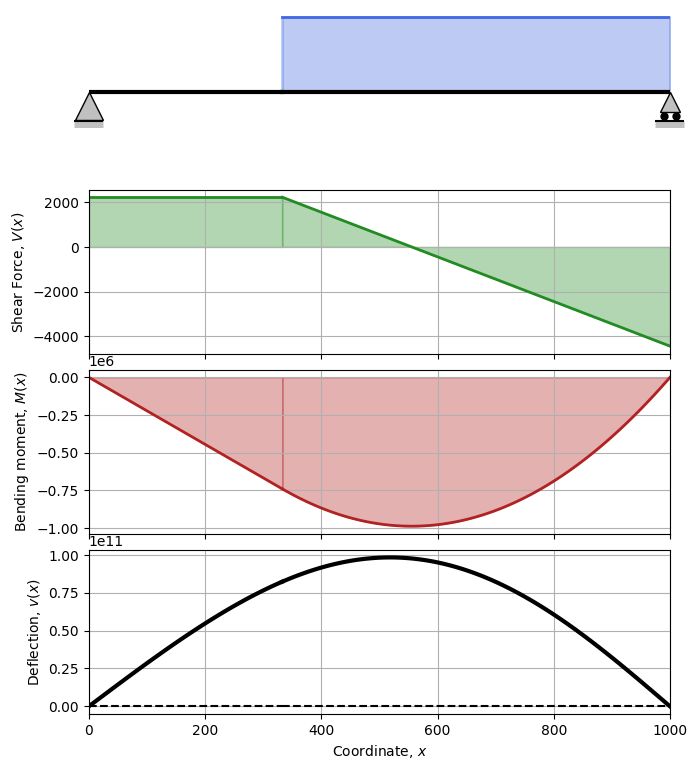

In [3]:
from symbeam_mod import beam
from sympy import symbols


b = beam(length=1000)


# Forces in kN (kN/m)
# Support types: pin, roller, fixed, hinge
b.add_support(0, 'pin')
b.add_support(1000, 'roller')

# Load types: point, moment, distributed

b.add_distributed_load(333, 1000, -10)


b.solve(show_calculations=True)
b.plot();




Bei Winkel 15.0°:
Sigma eta: 105.981
Sigma xi: 14.019
Tau eta xi: -19.641
______________________________
Bei Winkel 30.0°:
Sigma eta: 109.641
Sigma xi: 10.359
Tau eta xi: 5.981
______________________________


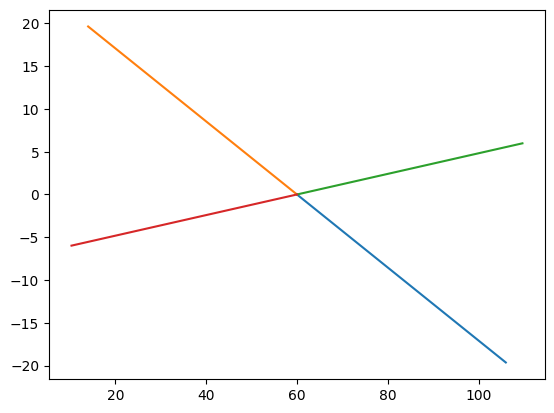

In [ ]:
%reset -f

from numpy import radians, degrees
from pylab import plot, cos, sin


sigma_x = 30
sigma_y = 90
tau_x = -40

winkel1 = radians(15)
winkel2 = radians(30)

def spannung(winkel1):
    print(f"Bei Winkel {round(degrees(winkel1), 2)}°:")
    sigma_eta = (sigma_x+sigma_y)/2-(sigma_x-sigma_y)/2*cos(2*winkel1)-tau_x*sin(2*winkel1)
    print(f"Sigma eta: {round(sigma_eta,3)}")
    sigma_xi = (sigma_x+sigma_y)/2+(sigma_x-sigma_y)/2*cos(2*winkel1)+tau_x*sin(2*winkel1)
    print(f"Sigma xi: {round(sigma_xi,3)}")
    tau_eta_xi = -(sigma_x-sigma_y)/2*sin(2*winkel1)+tau_x*cos(2*winkel1)
    print(f"Tau eta xi: {round(tau_eta_xi,3)}")
    sm = (sigma_x+sigma_y) / 2
    plot([sm,sigma_eta],[0,tau_eta_xi])
    plot([sm,sigma_xi],[0, -tau_eta_xi])
    print("_"*30)

spannung(winkel1)
spannung(winkel2)





In [6]:
from sympy import symbols, integrate, sqrt, diff, simplify, expand, sin, E, solve

s1 = symbols('s1')
s2 = symbols('s2')
m = symbols('m')
a = symbols('a')


def f(x):
    return s1 * E**(m*a) - s2

result = solve(f(s1), a)

print(result)


[log(s2/s1)/m]
